In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [3]:
x_train=x_train.astype("float32")
y_train=y_train.astype("float32")

In [4]:
xtrain=x_train/255
xtest=x_test/255


In [5]:
ytrain=keras.utils.to_categorical(y_train,10)
ytest=keras.utils.to_categorical(y_test,10)

In [6]:
ytrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
ytrain[1].argmax(axis=0)

9

In [8]:
xtrain[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [9]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

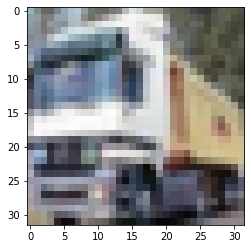

In [10]:
plt.imshow(xtrain[1])

In [11]:
modelt=Sequential()
modelt.add(Conv2D(32,(3,3),activation="relu",kernel_initializer="he_uniform",padding="same",input_shape=(32, 32, 3)))
modelt.add(MaxPooling2D((2,2)))
modelt.add(Conv2D(64,(3,3),activation="relu",kernel_initializer="he_uniform",padding="same"))
modelt.add(MaxPooling2D((2,2)))
modelt.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelt.add(MaxPooling2D((2, 2)))
modelt.add(Flatten())
modelt.add(Dense(128,activation="relu",kernel_initializer="he_uniform"))
modelt.add(Dropout(0.5))
modelt.add(Dense(10,activation='softmax'))
modelt.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [12]:
modelt.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])

In [13]:
history=modelt.fit(xtrain,ytrain,batch_size=32,epochs=25,verbose=2,validation_data=(xtest,ytest))

Epoch 1/25
1563/1563 - 6s - loss: 1.6620 - accuracy: 0.3874 - val_loss: 1.2399 - val_accuracy: 0.5623
Epoch 2/25
1563/1563 - 6s - loss: 1.2706 - accuracy: 0.5462 - val_loss: 1.0341 - val_accuracy: 0.6412
Epoch 3/25
1563/1563 - 6s - loss: 1.0972 - accuracy: 0.6153 - val_loss: 0.9135 - val_accuracy: 0.6862
Epoch 4/25
1563/1563 - 6s - loss: 0.9709 - accuracy: 0.6627 - val_loss: 0.8659 - val_accuracy: 0.6975
Epoch 5/25
1563/1563 - 6s - loss: 0.8795 - accuracy: 0.6925 - val_loss: 0.8382 - val_accuracy: 0.7065
Epoch 6/25
1563/1563 - 6s - loss: 0.7956 - accuracy: 0.7230 - val_loss: 0.8201 - val_accuracy: 0.7156
Epoch 7/25
1563/1563 - 6s - loss: 0.7324 - accuracy: 0.7431 - val_loss: 0.7828 - val_accuracy: 0.7317
Epoch 8/25
1563/1563 - 5s - loss: 0.6773 - accuracy: 0.7619 - val_loss: 0.7767 - val_accuracy: 0.7368
Epoch 9/25
1563/1563 - 6s - loss: 0.6193 - accuracy: 0.7828 - val_loss: 0.8289 - val_accuracy: 0.7313
Epoch 10/25
1563/1563 - 5s - loss: 0.5825 - accuracy: 0.7933 - val_loss: 0.7729 - 

In [14]:
def summary(history): 
    plt.subplot(211)
    plt.title("Loss")
    plt.plot(history.history['loss'],color="blue",label="train")
    plt.plot(history.history['val_loss'],color="orange",label="test")
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.tight_layout()
    plt.show()

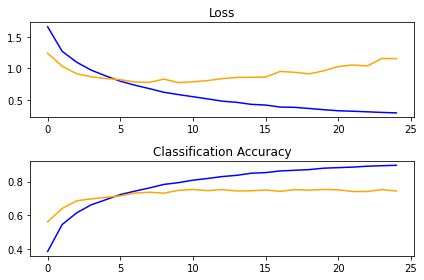

In [15]:
summary(history)

In [16]:
sc=modelt.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 1.1547 - accuracy: 0.7436


In [17]:
print("loss ",sc[0])
print("accuracy ",sc[1])

loss  1.1547362804412842
accuracy  0.7436000108718872
